In [1]:
import os
os.chdir('C:\\Users\\SHAILESH TIWARI\\Downloads\\Classification\\hr')

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
train = pd.read_csv('train.csv')
# getting their shapes
print("Shape of train :", train.shape)
#print("Shape of test :", test.shape)

Shape of train : (54808, 14)


In [4]:
train.shape

(54808, 14)

In [5]:
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [6]:
train.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [7]:
train.isna().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [8]:
#calculation of percentage of missing data
total = train.isnull().sum().sort_values(ascending=False)
percent_1 = train.isnull().sum()/train.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
previous_year_rating,4124,7.5
education,2409,4.4
is_promoted,0,0.0
avg_training_score,0,0.0
awards_won?,0,0.0


In [9]:
train['is_promoted'].value_counts() #unbalanced

0    50140
1     4668
Name: is_promoted, dtype: int64

In [10]:
train.shape

(54808, 14)

In [11]:
# finding the %age of people promoted

promoted = (4668/54808)*100
print("Percentage of Promoted Employees is {:.2f}%".format(promoted))

Percentage of Promoted Employees is 8.52%


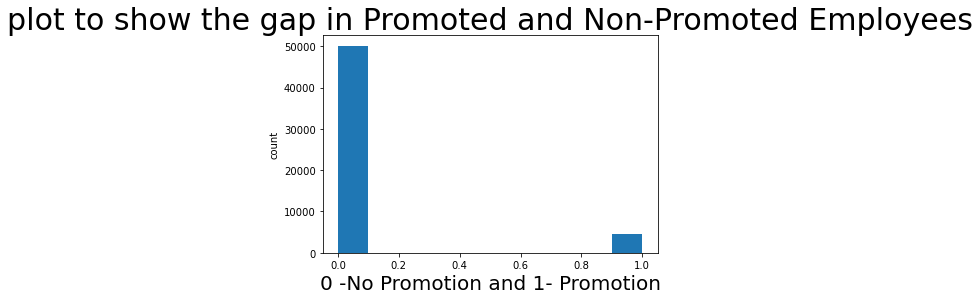

In [12]:
#plotting a scatter plot 

plt.hist(train['is_promoted'])
plt.title('plot to show the gap in Promoted and Non-Promoted Employees', fontsize = 30)
plt.xlabel('0 -No Promotion and 1- Promotion', fontsize = 20)
plt.ylabel('count')
plt.show()

In [13]:
s1=train.dtypes
s1.groupby(s1).count()

int64      8
float64    1
object     5
dtype: int64

In [14]:
train.dtypes

employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
is_promoted               int64
dtype: object

In [15]:
corr_matrix = train.corr(method='pearson')
corr_matrix['is_promoted'].sort_values(kind="quicksort")

no_of_trainings        -0.024896
age                    -0.017166
length_of_service      -0.010670
employee_id             0.001206
previous_year_rating    0.159320
avg_training_score      0.181147
awards_won?             0.195871
KPIs_met >80%           0.221582
is_promoted             1.000000
Name: is_promoted, dtype: float64

In [16]:
#dropping the column
train.drop(['employee_id','region'], axis = 1, inplace = True)

In [17]:
train.head()

,department,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,Sales & Marketing,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,Operations,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,Sales & Marketing,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,Sales & Marketing,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,Technology,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [18]:
train.columns.values

array(['department', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'], dtype=object)

In [19]:
#check for missing value, unique etc
FileNameDesc = pd.DataFrame(columns = ['column_name','missing_count','percent_missing','unique_count'])
for col in list(train.columns.values):
    sum_missing = train[col].isnull().sum()
    percent_missing = sum_missing/len(train)*100
    uniq_count = (train.groupby([col])[col].count()).count()
    FileNameDesc = FileNameDesc.append({'column_name':col,'missing_count':sum_missing,
                                        'percent_missing':percent_missing,'unique_count':uniq_count},
                                       ignore_index = True)

In [20]:
FileNameDesc

,column_name,missing_count,percent_missing,unique_count
0,department,0,0.000000,9
1,education,2409,4.395344,3
2,gender,0,0.000000,2
3,recruitment_channel,0,0.000000,3
4,no_of_trainings,0,0.000000,10
5,age,0,0.000000,41
6,previous_year_rating,4124,7.524449,5
7,length_of_service,0,0.000000,35
8,KPIs_met >80%,0,0.000000,2
9,awards_won?,0,0.000000,2


In [21]:
#Apply Mode strategy to populate the categorical data
train.groupby('education').agg({'education': np.size})

,education
education,
Bachelor's,36669
Below Secondary,805
Master's & above,14925


In [22]:
train["education"]=train["education"].fillna('Attchd')
train["education"]=train["education"].astype('category')
train["education"] = train["education"].cat.codes

In [23]:
train.isnull().sum()

department                 0
education                  0
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [24]:
train['previous_year_rating'].unique()

array([ 5.,  3.,  1.,  4., nan,  2.])

In [25]:
train['previous_year_rating'].mode()

0    3.0
dtype: float64

In [26]:
train['previous_year_rating'].fillna(1, inplace = True)

In [27]:
train.isnull().sum()

department              0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

In [28]:
train.dtypes

department               object
education                  int8
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
is_promoted               int64
dtype: object

In [29]:
data=pd.get_dummies(train,columns=['department','gender','recruitment_channel','previous_year_rating'],drop_first=True)

In [30]:
data

,education,no_of_trainings,age,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,department_Finance,department_HR,...,department_R&D,department_Sales & Marketing,department_Technology,gender_m,recruitment_channel_referred,recruitment_channel_sourcing,previous_year_rating_2.0,previous_year_rating_3.0,previous_year_rating_4.0,previous_year_rating_5.0
0,3,1,35,8,1,0,49,0,0,0,...,0,1,0,0,0,1,0,0,0,1
1,1,1,30,4,0,0,60,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,1,1,34,7,0,0,50,0,0,0,...,0,1,0,1,0,1,0,1,0,0
3,1,2,39,10,0,0,50,0,0,0,...,0,1,0,1,0,0,0,0,0,0
4,1,1,45,2,0,0,73,0,0,0,...,0,0,1,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,1,1,48,17,0,0,78,0,0,0,...,0,0,1,1,0,1,0,1,0,0
54804,3,1,37,6,0,0,56,0,0,0,...,0,0,0,0,0,0,1,0,0,0
54805,1,1,27,3,1,0,79,0,0,0,...,0,0,0,1,0,0,0,0,0,1
54806,0,1,29,2,0,0,45,0,0,0,...,0,1,0,1,0,1,0,0,0,0


In [31]:
df1=data['is_promoted']

In [32]:
data.drop(['is_promoted'], axis = 1, inplace = True)

In [33]:
data=pd.concat([data,df1],axis=1)

In [34]:
#Key data analysis
len(data)
data.head()
data.isnull().any()
data.isnull().sum()

education                       0
no_of_trainings                 0
age                             0
length_of_service               0
KPIs_met >80%                   0
awards_won?                     0
avg_training_score              0
department_Finance              0
department_HR                   0
department_Legal                0
department_Operations           0
department_Procurement          0
department_R&D                  0
department_Sales & Marketing    0
department_Technology           0
gender_m                        0
recruitment_channel_referred    0
recruitment_channel_sourcing    0
previous_year_rating_2.0        0
previous_year_rating_3.0        0
previous_year_rating_4.0        0
previous_year_rating_5.0        0
is_promoted                     0
dtype: int64

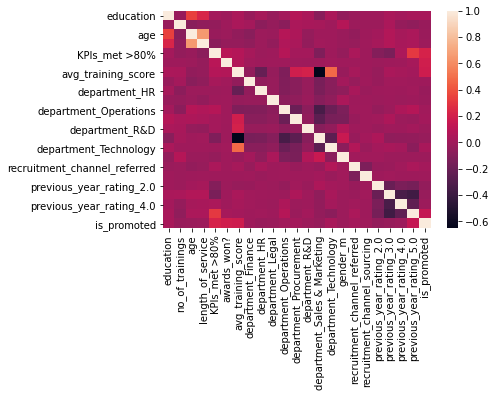

In [35]:
data.corr()
sns.heatmap(data.corr(),annot=False)

In [36]:
data.columns

Index(['education', 'no_of_trainings', 'age', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score',
       'department_Finance', 'department_HR', 'department_Legal',
       'department_Operations', 'department_Procurement', 'department_R&D',
       'department_Sales & Marketing', 'department_Technology', 'gender_m',
       'recruitment_channel_referred', 'recruitment_channel_sourcing',
       'previous_year_rating_2.0', 'previous_year_rating_3.0',
       'previous_year_rating_4.0', 'previous_year_rating_5.0', 'is_promoted'],
      dtype='object')

In [37]:
x = data.iloc[:,0:22].values
y = data.iloc[:,-1:].values

In [38]:
x

array([[ 3,  1, 35, ...,  0,  0,  1],
       [ 1,  1, 30, ...,  0,  0,  1],
       [ 1,  1, 34, ...,  1,  0,  0],
       ...,
       [ 1,  1, 27, ...,  0,  0,  1],
       [ 0,  1, 29, ...,  0,  0,  0],
       [ 1,  1, 27, ...,  0,  0,  0]], dtype=int64)

In [39]:
y

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int64)

In [40]:
from sklearn.preprocessing import StandardScaler    # to make the data in  standard format to read
sc = StandardScaler()  # feature scaling because salary and age are both in different scale
x=sc.fit_transform(x)

In [41]:
pd.DataFrame(x)

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,1.580565,-0.415276,0.025598,0.500460,1.356878,-0.154018,-1.075931,-0.220262,-0.214834,-0.139009,...,-0.136256,1.501543,-0.386960,-1.536223,-0.145876,1.166353,-0.289009,-0.717253,-0.468856,1.915225
1,-0.548662,-0.415276,-0.627135,-0.437395,-0.736986,-0.154018,-0.253282,-0.220262,-0.214834,-0.139009,...,-0.136256,-0.665982,-0.386960,0.650947,-0.145876,-0.857373,-0.289009,-0.717253,-0.468856,1.915225
2,-0.548662,-0.415276,-0.104948,0.265996,-0.736986,-0.154018,-1.001145,-0.220262,-0.214834,-0.139009,...,-0.136256,1.501543,-0.386960,0.650947,-0.145876,1.166353,-0.289009,1.394209,-0.468856,-0.522132
3,-0.548662,1.226063,0.547785,0.969387,-0.736986,-0.154018,-1.001145,-0.220262,-0.214834,-0.139009,...,-0.136256,1.501543,-0.386960,0.650947,-0.145876,-0.857373,-0.289009,-0.717253,-0.468856,-0.522132
4,-0.548662,-0.415276,1.331064,-0.906322,-0.736986,-0.154018,0.718939,-0.220262,-0.214834,-0.139009,...,-0.136256,-0.665982,2.584249,0.650947,-0.145876,-0.857373,-0.289009,1.394209,-0.468856,-0.522132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,-0.548662,-0.415276,1.722704,2.610632,-0.736986,-0.154018,1.092871,-0.220262,-0.214834,-0.139009,...,-0.136256,-0.665982,2.584249,0.650947,-0.145876,1.166353,-0.289009,1.394209,-0.468856,-0.522132
54804,1.580565,-0.415276,0.286691,0.031532,-0.736986,-0.154018,-0.552428,-0.220262,-0.214834,-0.139009,...,-0.136256,-0.665982,-0.386960,-1.536223,-0.145876,-0.857373,3.460102,-0.717253,-0.468856,-0.522132
54805,-0.548662,-0.415276,-1.018775,-0.671858,1.356878,-0.154018,1.167657,-0.220262,-0.214834,-0.139009,...,-0.136256,-0.665982,-0.386960,0.650947,-0.145876,-0.857373,-0.289009,-0.717253,-0.468856,1.915225
54806,-1.613276,-0.415276,-0.757681,-0.906322,-0.736986,-0.154018,-1.375077,-0.220262,-0.214834,-0.139009,...,-0.136256,1.501543,-0.386960,0.650947,-0.145876,1.166353,-0.289009,-0.717253,-0.468856,-0.522132


In [42]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.20, random_state=0)

In [43]:
# applying logistic regression
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(x_train,y_train)

C:\Users\SHAILESH TIWARI\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [44]:
# prediction for x_test
y_pred = logmodel.predict(x_test)

In [45]:
y_pred

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [46]:
y_test

array([[0],
       [0],
       [0],
       ...,
       [1],
       [0],
       [0]], dtype=int64)

In [47]:
# concept of confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[9986,   55],
       [ 678,  243]], dtype=int64)

In [48]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9331326400291917

In [49]:
len(y_test)

10962

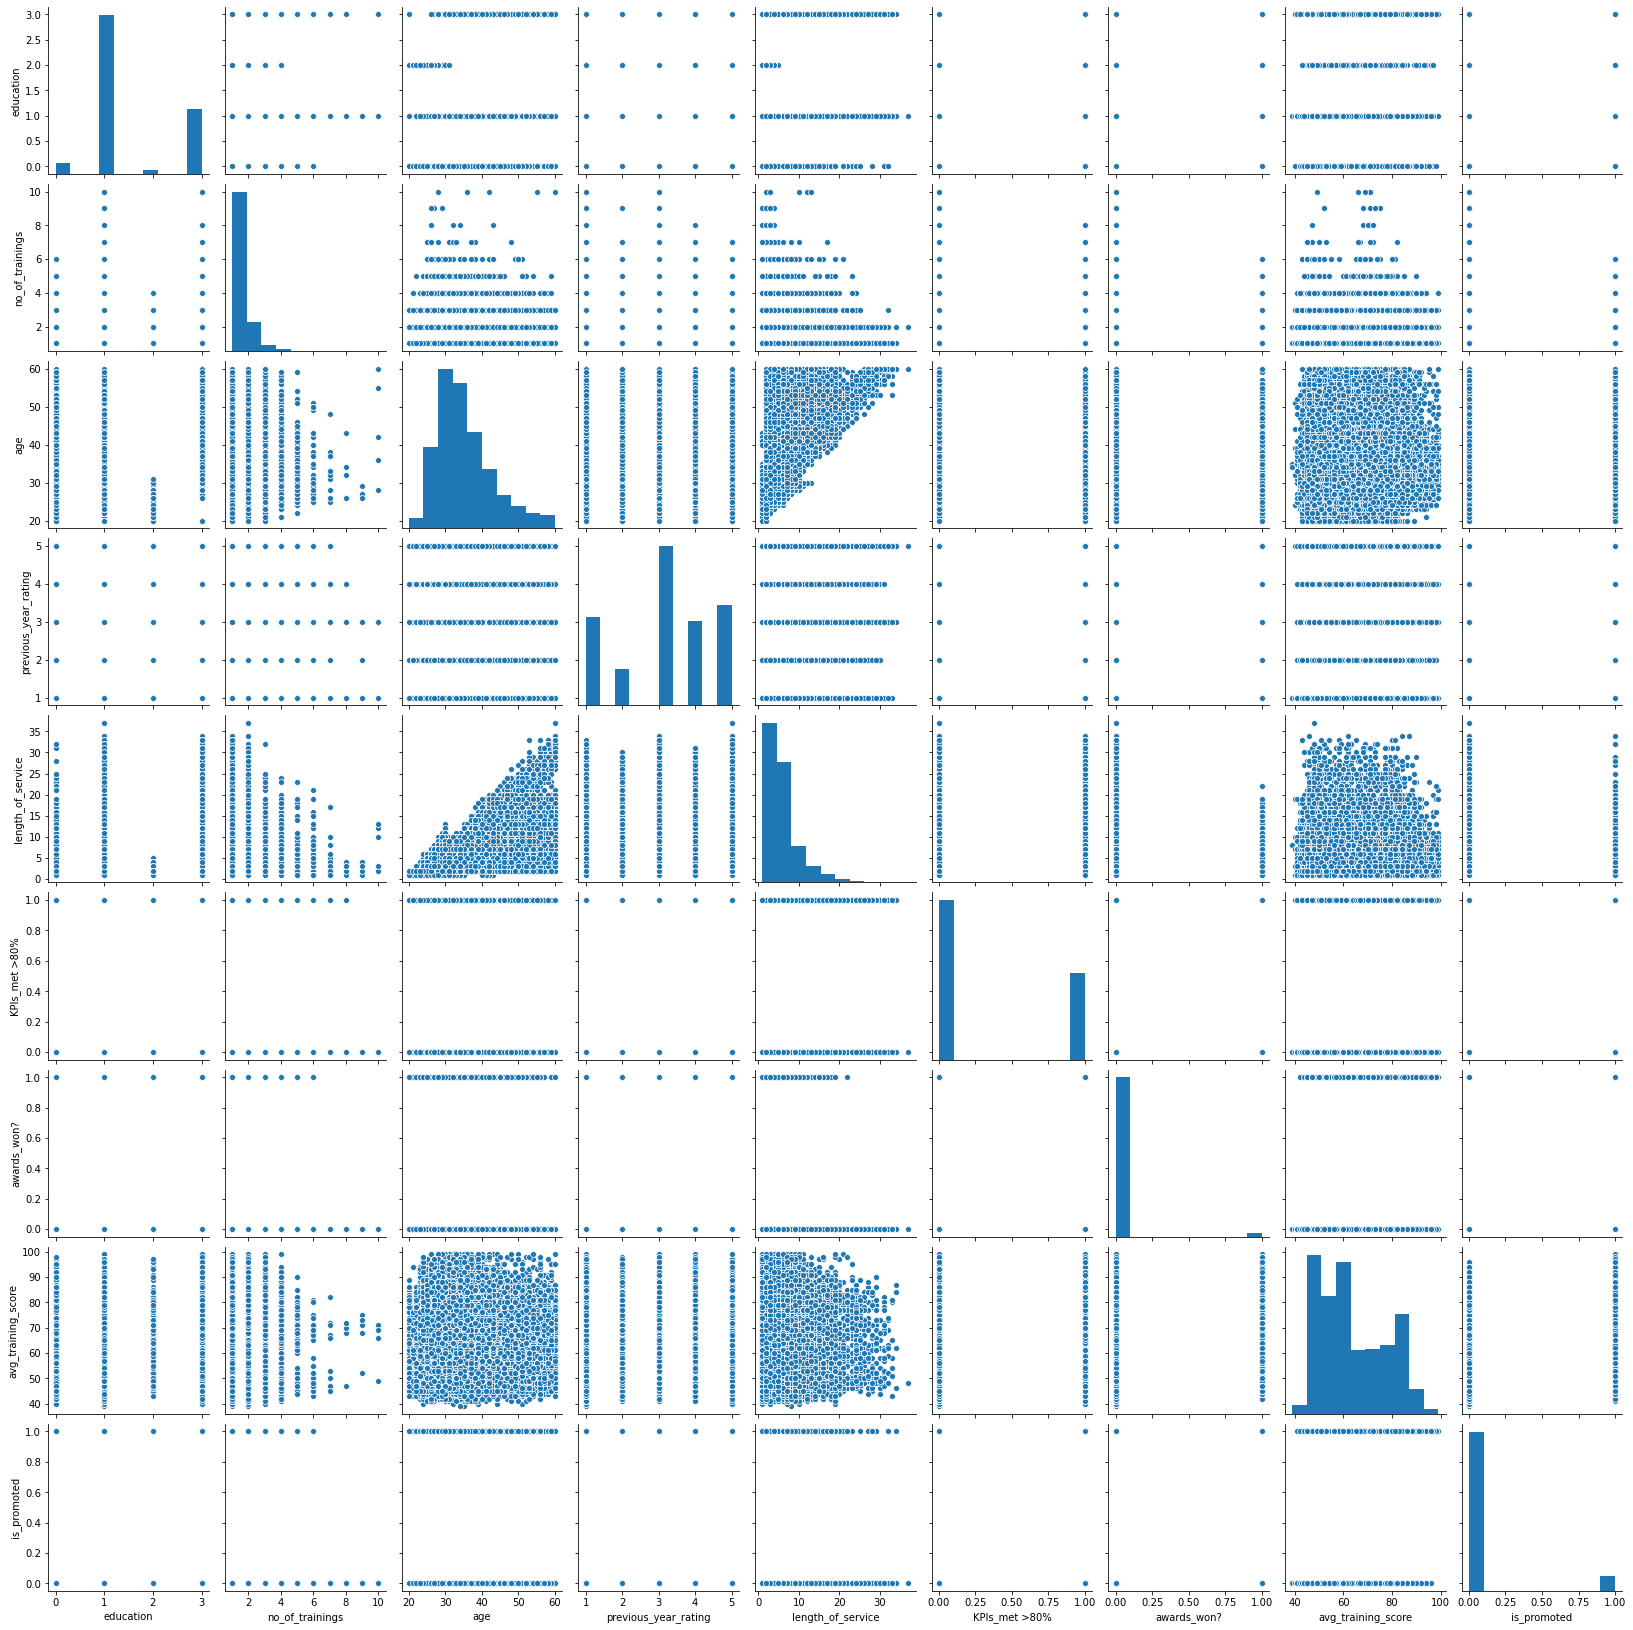

In [50]:
sns.pairplot(train)

In [51]:
# applying cross validation on top of algo
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=logmodel, X=x_train,y=y_train,cv=10)

C:\Users\SHAILESH TIWARI\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\SHAILESH TIWARI\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\SHAILESH TIWARI\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\SHAILESH TIWARI\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

In [52]:
accuracies

array([0.931813  , 0.93249715, 0.93477765, 0.9327252 , 0.93432155,
       0.9299886 , 0.93042883, 0.93042883, 0.93476277, 0.9267792 ])

In [53]:
accuracies.mean()

0.9318522782128855

In [54]:
# k nearest neighbour  algo applying
from sklearn.neighbors import KNeighborsClassifier
classifier_knn =KNeighborsClassifier(n_neighbors=11,metric='euclidean',p=2)
classifier_knn.fit(x_train,y_train)

C:\Users\SHAILESH TIWARI\anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='uniform')

In [55]:
y_pred_knn = classifier_knn.predict(x_test)

In [56]:
y_pred_knn

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [57]:
y_test

array([[0],
       [0],
       [0],
       ...,
       [1],
       [0],
       [0]], dtype=int64)

In [58]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred_knn)

array([[9989,   52],
       [ 790,  131]], dtype=int64)

In [59]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_knn)

0.9231891990512681

In [60]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=classifier_knn, X=x_train,y=y_train,cv=10)

C:\Users\SHAILESH TIWARI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\SHAILESH TIWARI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\SHAILESH TIWARI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\SHAILESH TIWARI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: 

In [61]:
accuracies

array([0.91881414, 0.91927024, 0.92041049, 0.92041049, 0.92018244,
       0.91904219, 0.92084854, 0.91925182, 0.92153285, 0.91970803])

In [62]:
accuracies.mean()

0.9199471229473403

In [63]:
# naiye baise algo application
from sklearn.naive_bayes import GaussianNB
classifier_nb =GaussianNB()
classifier_nb.fit(x_train,y_train)

C:\Users\SHAILESH TIWARI\anaconda3\lib\site-packages\sklearn\naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

In [64]:
y_pred_nb = classifier_nb.predict(x_test)

In [65]:
y_pred_nb

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [66]:
y_test

array([[0],
       [0],
       [0],
       ...,
       [1],
       [0],
       [0]], dtype=int64)

In [67]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred_nb)

array([[9414,  627],
       [ 669,  252]], dtype=int64)

In [68]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_nb)

0.8817733990147784

In [69]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=classifier_nb, X=x_train,y=y_train,cv=10)

C:\Users\SHAILESH TIWARI\anaconda3\lib\site-packages\sklearn\naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\SHAILESH TIWARI\anaconda3\lib\site-packages\sklearn\naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\SHAILESH TIWARI\anaconda3\lib\site-packages\sklearn\naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\SHAILESH TIWARI\anaconda3\lib\site-packages\sklearn\naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of 

In [70]:
accuracies

array([0.88415051, 0.88095781, 0.87844926, 0.88597491, 0.88072976,
       0.88141391, 0.88001825, 0.87682482, 0.88822993, 0.87750912])

In [71]:
accuracies.mean()

0.8814258285545448

In [72]:
# support vector machine application through sigmoid kernel
from sklearn.svm import SVC
classifier_svm_sig = SVC(kernel='sigmoid')
classifier_svm_sig.fit(x_train,y_train)

C:\Users\SHAILESH TIWARI\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [73]:
pred_svm_sig = classifier_svm_sig.predict(x_test)

In [74]:
pred_svm_sig

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [75]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred_svm_sig)

array([[9348,  693],
       [ 747,  174]], dtype=int64)

In [76]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred_svm_sig)

0.8686371100164204

In [78]:
# support vector machine application through linear kernel
from sklearn.svm import SVC
classifier_svm_lin = SVC(kernel='linear')
classifier_svm_lin.fit(x_train,y_train)

C:\Users\SHAILESH TIWARI\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [79]:
y_pred_svm_lin = classifier_svm_lin.predict(x_test)

In [80]:
y_pred_svm_lin

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [81]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred_svm_lin)

array([[10041,     0],
       [  802,   119]], dtype=int64)

In [82]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_svm_lin)

0.9268381682174786

In [83]:
# support vector machine application through polynomial kernel
from sklearn.svm import SVC
classifier_svm_poly = SVC(kernel='poly')
classifier_svm_poly.fit(x_train,y_train)

C:\Users\SHAILESH TIWARI\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [84]:
y_pred_svm_poly = classifier_svm_poly.predict(x_test)

In [85]:
y_pred_svm_poly

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [86]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred_svm_poly)

array([[10029,    12],
       [  738,   183]], dtype=int64)

In [87]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_svm_poly)

0.9315818281335523

In [88]:
# support vector machine application through rbf kernel
from sklearn.svm import SVC
classifier_svm_rbf = SVC(kernel='rbf')
classifier_svm_rbf.fit(x_train,y_train)

C:\Users\SHAILESH TIWARI\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [89]:
y_pred_svm_rbf = classifier_svm_rbf.predict(x_test)

In [90]:
y_pred_svm_rbf

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [91]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred_svm_rbf)

array([[10035,     6],
       [  708,   213]], dtype=int64)

In [92]:
#accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_svm_rbf)

0.9348659003831418

In [93]:
#running decision tree algo
from sklearn.tree import DecisionTreeClassifier
classifier_dt =DecisionTreeClassifier(criterion='entropy') # also can use gini
classifier_dt.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [95]:
y_pred_dt =classifier_dt.predict(x_test)

In [96]:
y_pred_dt

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [97]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred_dt)

array([[9516,  525],
       [ 506,  415]], dtype=int64)

In [98]:
# accuracy score calculation
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_dt)

0.9059478197409232

In [99]:
# running random forest algorithm
from sklearn.ensemble import RandomForestClassifier
classifier_rf =RandomForestClassifier(n_estimators=3, criterion='entropy')
classifier_rf.fit(x_train,y_train)

C:\Users\SHAILESH TIWARI\anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=3,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [100]:
y_pred_rf =classifier_rf.predict(x_test)

In [101]:
y_pred_rf

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [102]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred_rf)

array([[9741,  300],
       [ 598,  323]], dtype=int64)

In [103]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_rf)

0.9180806422185732